In [179]:
import pandas as pd
from pathlib import Path

data_path = Path('datasets/Iris.csv')

dataset_df = pd.read_csv(data_path).drop(columns=["Id"])
dataset_df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizing the relation/covariance between features

In [180]:
X = dataset_df.drop(columns=['Species'])
y = dataset_df['Species']



Text(0, 0.5, 'petal_width')

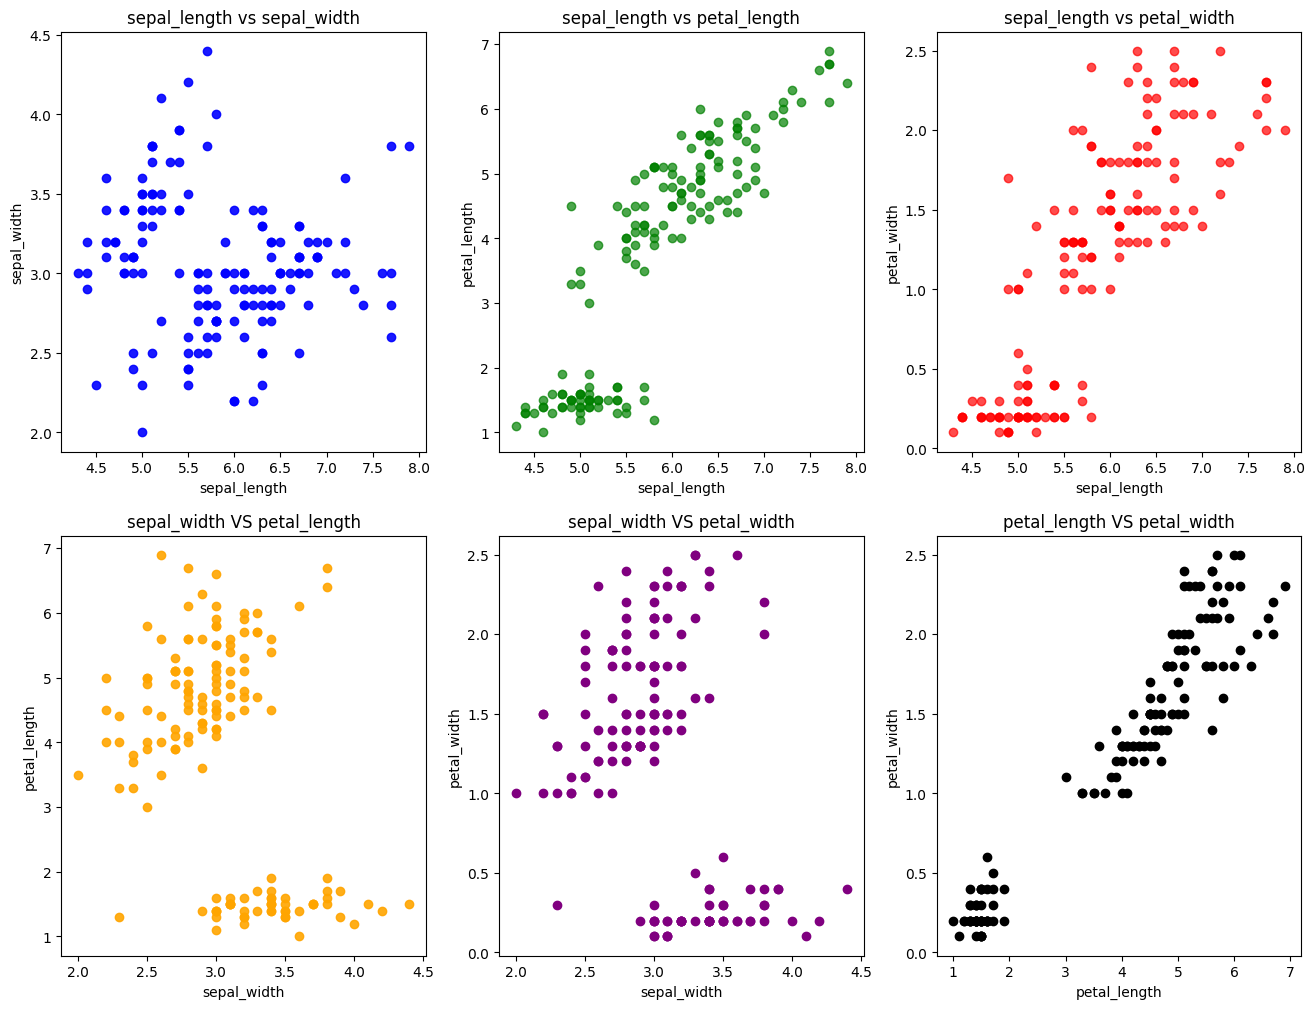

In [181]:
import matplotlib.pyplot as plt

sepal_length = X['SepalLengthCm']
sepal_width = X['SepalWidthCm']
petal_length = X['PetalLengthCm']
petal_width = X['PetalWidthCm']


fig, axes = plt.subplots(2, 3, figsize=(16, 12))

# X vs A
axes[0][0].scatter(sepal_length, sepal_width, alpha=0.9, color='blue')
axes[0][0].set_title("sepal_length vs sepal_width")
axes[0][0].set_xlabel("sepal_length")
axes[0][0].set_ylabel("sepal_width")

# X vs B
axes[0][1].scatter(sepal_length, petal_length, alpha=0.7, color='green')
axes[0][1].set_title("sepal_length vs petal_length")
axes[0][1].set_xlabel("sepal_length")
axes[0][1].set_ylabel("petal_length")

# X vs C
axes[0][2].scatter(sepal_length, petal_width, alpha=0.7, color='red')
axes[0][2].set_title("sepal_length vs petal_width")
axes[0][2].set_xlabel("sepal_length")
axes[0][2].set_ylabel("petal_width")

# A VS B
axes[1][0].scatter(sepal_width, petal_length, alpha=0.9, color='orange')
axes[1][0].set_title("sepal_width VS petal_length")
axes[1][0].set_xlabel("sepal_width")
axes[1][0].set_ylabel("petal_length")

# A VS C
axes[1][1].scatter(sepal_width, petal_width, alpha=1, color='purple')
axes[1][1].set_title("sepal_width VS petal_width")
axes[1][1].set_xlabel("sepal_width")
axes[1][1].set_ylabel("petal_width")

# B VS C
axes[1][2].scatter(petal_length, petal_width, alpha=1, color='black')
axes[1][2].set_title("petal_length VS petal_width")
axes[1][2].set_xlabel("petal_length")
axes[1][2].set_ylabel("petal_width")

## Covariance intuition

#### Basically it gives you a matrix that describes the relationship per feature, like kapag ba nagincrease yung hours studied, maiincrease din ba yung score ni student. 
#### * Positive - if one increases the other increases too, or if one decreases the other decreases too (parang proportional sila ganern)
#### * Negative - if one increases the other decreases, or if one decreases the other increases (parang inversely proportional)
#### * Zero (or close to zero) - If one increases or decreases the other does not change, if not changes only very slightly. Meaning they have no relationship

#### How to compute covariance matrix: https://www.cuemath.com/algebra/covariance-matrix/

In [182]:
import numpy as np

# compute covariance
dataset_features_stacked = np.stack([sepal_length, sepal_width, petal_length, petal_width])

# 1. Get the average per featre
means = dataset_features_stacked.mean(axis=1, keepdims=True)

# 2. Center the data, kung ivivisualize parang iuusog or igigitna lang yung mga points.
X_centered = dataset_features_stacked - means

# 3. Take the sum of the squares of the differences obtained in the previous step. 
X_sum_of_squares = X_centered.sum(axis=1)

# 4. Divide this value by 1 less than the total to get the sample variance of every variable.
n = dataset_features_stacked.shape[1]
X_sample_variance = X_sum_of_squares/(n-1)

# 5. Multiply the corresponding observations.
cov_matrix = np.dot(X_centered, X_centered.T)/(n-1)
cov_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]])

### Let's try to verify the code's reliablity by comparing it with Numpy's function np.cov()

In [ ]:
# Using numpy's np.cov function vs hard-coded (Identical naman for demonstration of the inner workings lng)
np.cov(dataset_features_stacked), cov_matrix

(array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
        [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
        [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
        [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]]),
 array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ],
        [-0.03926846,  0.18800403, -0.32171275, -0.11798121],
        [ 1.27368233, -0.32171275,  3.11317942,  1.29638747],
        [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432]]))

In [184]:
import pandas as pd

# DataFrame nung cov for visualization
df_cov = pd.DataFrame(cov_matrix,
                      index=list(X.columns),
                      columns=list(X.columns))
df_cov

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,0.685694,-0.039268,1.273682,0.516904
SepalWidthCm,-0.039268,0.188004,-0.321713,-0.117981
PetalLengthCm,1.273682,-0.321713,3.113179,1.296387
PetalWidthCm,0.516904,-0.117981,1.296387,0.582414


### Visualization using seaborn

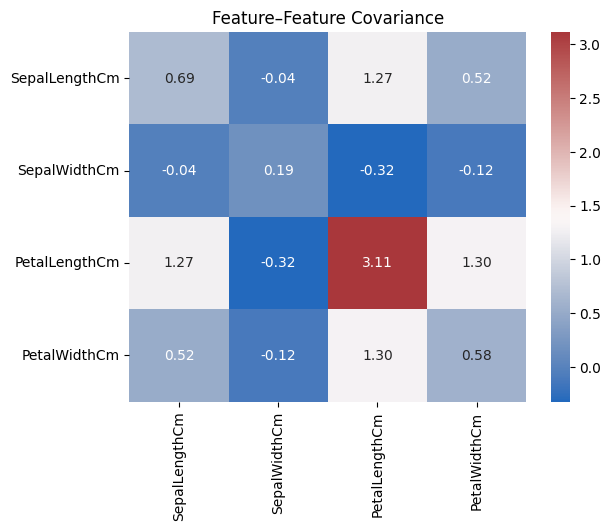

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_cov, annot=True, fmt=".2f", cmap="vlag")
plt.title("Feature–Feature Covariance")
plt.show()


### - Find the eigenvector and eigenvalue using the covariance matrix we just got.
### - Apply linear transformation to the dataset using the eigenvectors we just got.

##### *Link that may help to understand about linear transformation: https://www.youtube.com/watch?v=kYB8IZa5AuE&ab_channel=3Blue1Brown*

In [194]:
from numpy import linalg as LA
import pandas as pd

eigenvalues, eigenvectors = LA.eig(cov_matrix)

# Get the top k eigenvectors (basically kung ilang Principal component, so usually k=2 ung madalas)
k = 2
top_eigenvectors = eigenvectors[:, :k]
top_eigenvalues = eigenvalues[:k]

# Perform linear transformation, basically pinoproject natin ung data from N dimensions to k dimension or kung ilan yung vectors (try to watch the youtube link directly from above to understand this more clearly).
X_pca = np.dot(X_centered.T, top_eigenvectors) 

PC_1 = X_pca[:, 0]
PC_2 = X_pca[:, 1]

dict_pc = {'PC_1': PC_1,
           'PC_2': PC_2}

df_PC = pd.DataFrame(data=dict_pc)
df_PC

,PC_1,PC_2
0,-2.684207,-0.326607
1,-2.715391,0.169557
2,-2.889820,0.137346
3,-2.746437,0.311124
4,-2.728593,-0.333925
...,...,...
145,1.944017,-0.187415
146,1.525664,0.375021
147,1.764046,-0.078519
148,1.901629,-0.115877


### Visualize the data

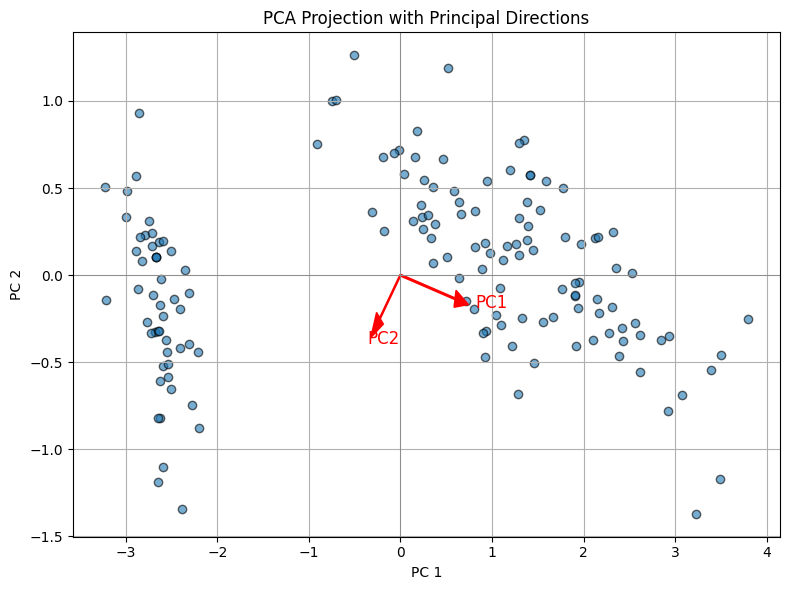

In [195]:
# scatter the data 
plt.figure(figsize=(8,6))
plt.scatter(PC_1, PC_2, alpha=0.6, edgecolor='k')
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title("PCA Projection with Principal Directions")

# draw arrows for each eigenvector
origin = np.zeros(k)
for i in range(k):
    vec = top_eigenvectors[:, i]
    # scale by sqrt(eigenvalue) so length is roughly the standard deviation along that PC
    length = np.sqrt(top_eigenvalues[i])
    arrow_vec = vec * length
    plt.arrow(
        origin[0], origin[1],
        arrow_vec[0], arrow_vec[1],
        color='red', width=0.01, head_width=0.1, length_includes_head=True
    )
    # label it
    plt.text(
        arrow_vec[0]*1.1,
        arrow_vec[1]*1.1,
        f"PC{i+1}",
        color='red',
        fontsize=12
    )

plt.axhline(0, color='gray', lw=0.5)
plt.axvline(0, color='gray', lw=0.5)
plt.grid(True)
plt.tight_layout()
plt.show()

### Sklearn's PCA vs Our own PCA using Numpy

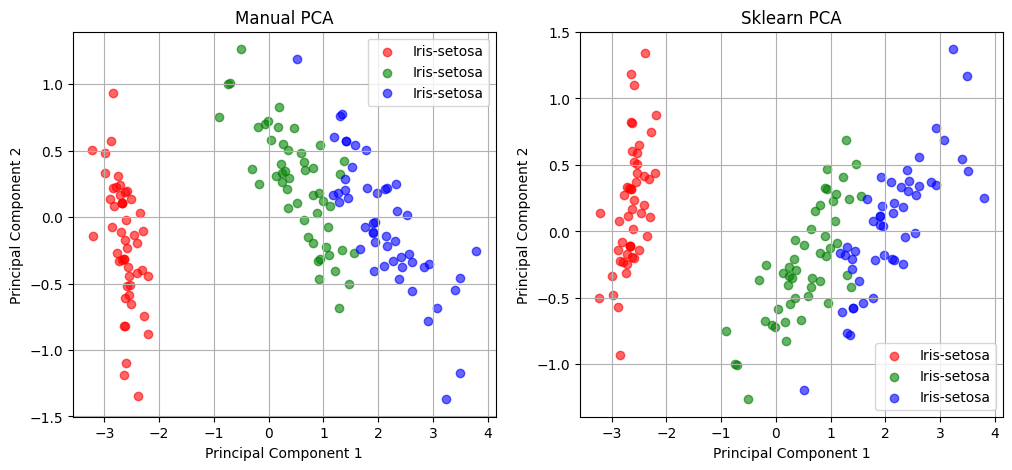

In [196]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# Plot both
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# encode y category names to numbers
encoder = LabelEncoder()
y_numeric = encoder.fit_transform(y)

# Sklearn PCA plot
sklearn_pca = PCA(n_components=2)
X_pca_sklearn = sklearn_pca.fit_transform(X)

colors = ['r', 'g', 'b']
labels = list(y)

# Manual PCA plot
for i in range(3):
    ax1.scatter(PC_1[y_numeric == i], PC_2[y_numeric == i], 
                c=colors[i], label=labels[i], alpha=0.6)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('Manual PCA')
ax1.legend()
ax1.grid(True)

for i in range(3):
    ax2.scatter(X_pca_sklearn[y_numeric == i, 0], X_pca_sklearn[y_numeric == i, 1], 
                c=colors[i], label=labels[i], alpha=0.6)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Sklearn PCA')
ax2.legend()
ax2.grid(True)
plt.show()


#### That horizontal “mirror” you’re seeing above isn’t a bug in the math/code above, it’s just the old “sign ambiguity” of eigenvectors.  If v is an eigenvector, so is –v—and projecting onto v vs. –v just flips that axis. This is called *Sign ambuigity*

#### scikit‑learn’s PCA (which uses SVD I don't know what this is tho) which also has sign ambiguity that may differ from NumPy’s linalg.eig.

In [197]:
"""
What we can do to match Sklearn's PCA with our own PCA, we can check the sign of each PC(our eigenvector) and flip if inversely related with Sklearn's PC.

"""

k = 2
# Sklearn PCA 
sklearn_pca = PCA(n_components=2)
X_pca_sklearn = sklearn_pca.fit_transform(X)

# For each component, check sign and flip if negatively correlated or maybe just adjust the sign of the first eigenvector
for i in range(k):
    manual_scores = X_centered.T.dot(top_eigenvectors[:, i])
    corr = np.corrcoef(X_pca_sklearn[:, i], manual_scores)[0,1]
    if corr < 0:
        top_eigenvectors[:, i] *= -1
        manual_scores *= -1

## Performing linear transformation to our dataset using our flipped eigenvector and compare it again with sklearn's PCA

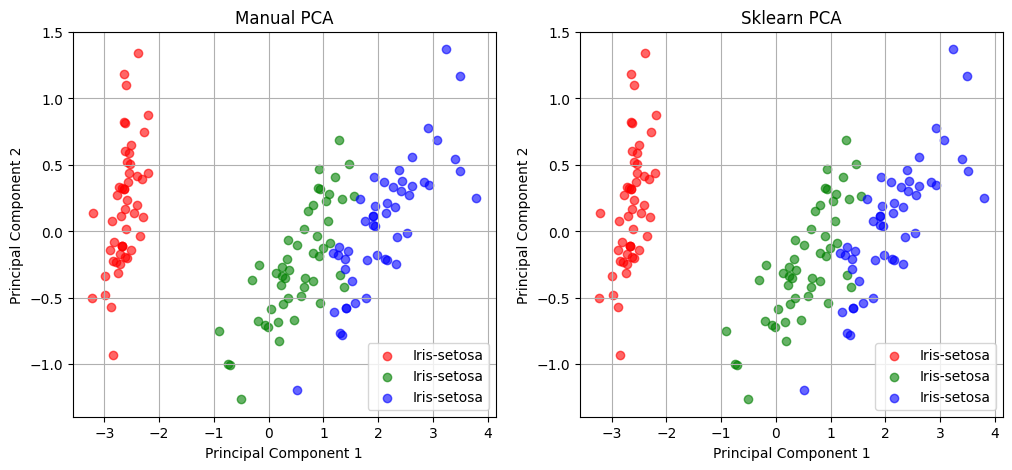

In [198]:
# Perform linear transformation again, basically pinoproject natin ung data from N dimensions to k dimension or kung ilan yung vectors (try to watch the youtube link directly from above to understand this more clearly).
X_pca = np.dot(X_centered.T, top_eigenvectors) 

PC_1 = X_pca[:, 0]
PC_2 = X_pca[:, 1]

# Plot both again
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

colors = ['r', 'g', 'b']
labels = list(y)

# Manual PCA plot
for i in range(3):
    ax1.scatter(PC_1[y_numeric == i], PC_2[y_numeric == i], 
                c=colors[i], label=labels[i], alpha=0.6)
ax1.set_xlabel('Principal Component 1')
ax1.set_ylabel('Principal Component 2')
ax1.set_title('Manual PCA')
ax1.legend()
ax1.grid(True)

# Sklearn PCA plot
for i in range(3):
    ax2.scatter(X_pca_sklearn[y_numeric == i, 0], X_pca_sklearn[y_numeric == i, 1], 
                c=colors[i], label=labels[i], alpha=0.6)
ax2.set_xlabel('Principal Component 1')
ax2.set_ylabel('Principal Component 2')
ax2.set_title('Sklearn PCA')
ax2.legend()
ax2.grid(True)
plt.show()


### Train a KNN using PCA

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

def euclidean_distance(p, q): # p and q are the data points
    return np.sqrt(np.sum((np.array(p) - np.array(q))**2))

class KNearestNeighbors:
    def __init__(self, k):
        self.k = k
        self.point = None

    def fit(self, points): # training the model means literally just having the points existing, because the points IS the trained model.
        self.points = points

    def predict(self, new_point): # calculating the distance between the one new points to predict for between points
        distances = []

        for category, points in zip(self.points.keys(), self.points.values()):
            for point in points:
                distance = euclidean_distance(new_point, point)
                distances.append([distance, category])

        categories = [category[1] for category in sorted(distances,key=lambda x: x[0])[:self.k]] # use the first element of each sublist as the key to sort.”)
        most_common = Counter(categories).most_common(1)[0][0]
        return most_common

In [ ]:
# Split to train and test

from sklearn.model_selection import train_test_split

dict_pc = {'PC_1': PC_1,
           'PC_2': PC_2}

df_PC = pd.DataFrame(data=dict_pc)

X_train, X_test, y_train, y_test = train_test_split(df_PC, y, test_size=0.2, random_state=42)
X_train.head()

,PC_1,PC_2
22,-3.215858,0.141616
15,-2.383869,1.344754
65,0.927573,0.468236
11,-2.613143,0.021521
42,-2.998296,-0.334308


In [210]:
train_df = pd.concat([X_train, y_train], axis=1)

# Group by species and convert to dict
train_grouped = train_df.groupby("Species")
train_species_dict = {species: datapoint.drop(columns=["Species"]).values.tolist()
                for species, datapoint in train_grouped}
train_species_dict.keys()

dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

In [211]:
# Predict using the test values
X_test = X_test.values.tolist()

model = KNearestNeighbors(5)
model.fit(train_species_dict)
y_preds = [model.predict(test_datapoint) for test_datapoint in X_test]
y_preds

['Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa']

In [212]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# 1. Accuracy
acc = accuracy_score(y_test, y_preds)
print(f"Accuracy: {acc:.3f}")

# 2. Confusion Matrix
cm = confusion_matrix(y_test, y_preds,
                      labels=['Iris-setosa','Iris-versicolor','Iris-virginica'])
print("Confusion Matrix:\n", cm)

# 3. Classification Report (precision, recall, f1)
print("\nClassification Report:\n",
      classification_report(y_test, y_preds,
                            target_names=['setosa','versicolor','virginica']))


Accuracy: 1.000
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

